In [1]:
from openai import OpenAI

openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8000/v1"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)

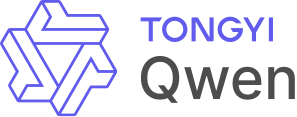

In [39]:
from PIL import Image
import requests
from io import BytesIO

def show_image(image_url):
    if image_url.startswith("file://"):
        img = Image.open(image_url[7:])
    else:
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))
    # 缩放图片, 按最长边为 1280 像素. 仅当图片尺寸超过 1280x1280 时缩放.
    max_size = 640
    if img.width > max_size or img.height > max_size:
        if img.width > img.height:
            img = img.resize((max_size, int(max_size * img.height / img.width)))
        else:
            img = img.resize((int(max_size * img.width / img.height), max_size))
    img.show()

# 图片网址
image_url = "https://modelscope.oss-cn-beijing.aliyuncs.com/resource/qwen.png"

show_image(image_url)

In [ ]:
# Single-image input inference
image_url = "https://modelscope.oss-cn-beijing.aliyuncs.com/resource/qwen.png"

chat_response = client.chat.completions.create(
    model="Qwen2-VL-7B-Instruct",
    messages=[{
        "role": "user",
        "content": [
            # NOTE: The prompt formatting with the image token `<image>` is not needed
            # since the prompt will be processed automatically by the API server.
            {"type": "text", "text": "描述下图片?"},
            {"type": "image_url", "image_url": {"url": image_url}},
        ],
    }],
)
print("Chat completion output:", chat_response.choices[0].message.content)


In [28]:
# 如果是本地文件, 需要用 file:// 开头的
image_url = "file:///mnt/e/BaiduNetdiskDownload/女明星合集/【金智秀】/J/0 (2).jpg"
image_url = "file:///mnt/e/BaiduNetdiskDownload/精选图片/迪丽热巴/002迪丽热巴4k/0ba15f72c1wjQeI.jpg"

chat_response = client.chat.completions.create(
    model="Qwen2-VL-7B-Instruct",
    messages=[{
        "role": "user",
        "content": [
            # NOTE: The prompt formatting with the image token `<image>` is not needed
            # since the prompt will be processed automatically by the API server.
            {"type": "text", "text": "详细描述下图片, 给出200字的作文?"},
            {"type": "image_url", "image_url": {"url": image_url}},
        ],
    }],
    max_tokens=512,
)
print("Chat completion output:", chat_response.choices[0].message.content)

Chat completion output: 这张图片展示了一位穿着黄色连衣裙的女性。她的身体向镜头倾斜，目光回眸望去，显得非常自信和优雅。她有着乌黑的长发，扎成高马尾，显得干练而又不失柔美。她穿着一件亮黄色的连衣裙，裙子上有一些金属质感的装饰，增加了整体的时尚感。她的手臂自然地弯曲在身前，左手微微抬起，手指轻轻触碰，显得非常自然和不经意。

图片的背景是浅蓝色的，与黄色的连衣裙形成鲜明的对比，使整个人物更加突出。整体画面给人一种时尚、自信和优雅的感觉。


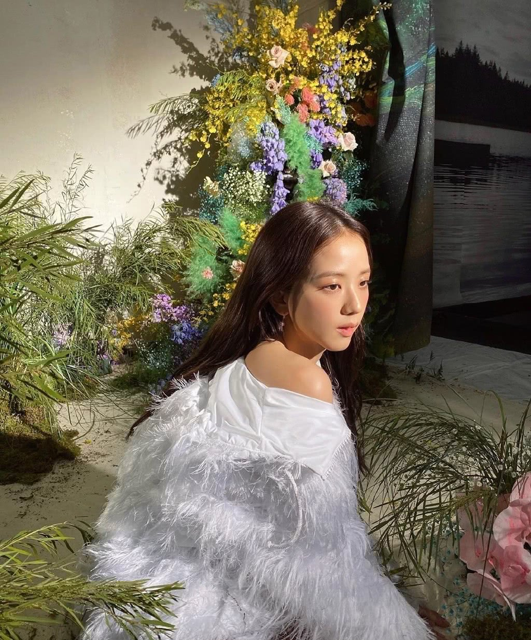

In [40]:
show_image(image_url1)

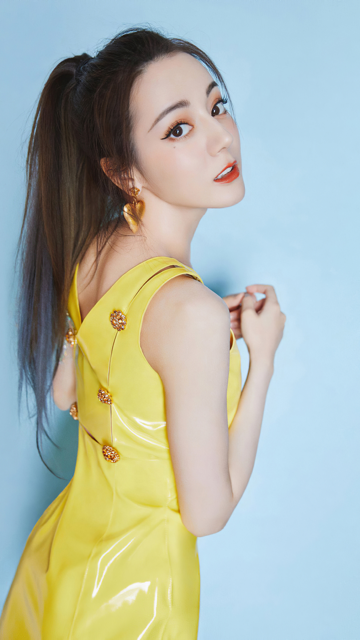

In [41]:
show_image(image_url2)

In [30]:
# Multi-image input inference
image_url1 = "file:///mnt/e/BaiduNetdiskDownload/女明星合集/【金智秀】/J/0 (2).jpg"
image_url2 = "file:///mnt/e/BaiduNetdiskDownload/精选图片/迪丽热巴/002迪丽热巴4k/0ba15f72c1wjQeI.jpg"

chat_response = client.chat.completions.create(
    model="Qwen2-VL-7B-Instruct",
    messages=[{
        "role": "user",
        "content": [
            {"type": "text", "text": "这两个图片有什么不同?"},
            {"type": "image_url", "image_url": {"url": image_url1}},
            {"type": "image_url", "image_url": {"url": image_url2}},
        ],
    }],
)
print("Chat completion output:", chat_response.choices[0].message.content)

Chat completion output: 这两个图片的不同点如下：

1. **服装颜色**：
   - 图片1中的服装是白色的，且带有羽毛装饰。
   - 图片2中的服装是亮黄色的，背部有亮黄色的装饰。

2. **饰物**：
   - 图片1中的配饰是银色的耳环。
   - 图片2中的配饰是金色的耳环和金色的项链。

3. **背景和环境**：
   - 图片1的背景是花卉和植物。
   - 图片2的背景是浅蓝色的单色背景。

4. **姿势和表情**：
   - 图片1中的女性微微侧身，看向左侧。
   - 图片2中的女性双手叉腰，面向相机，表情夸张。

这些差异使得两个图片在视觉效果上有明显的区别。
